## CS 156a, HW #4, P1-3
### Author: Liting Xiao

This notebook:
- compares different generalization bounds (*VC, Rademacher Penalty, Parrondo and Van den Broek, Devroye*) numerically

In [1]:
import numpy as np
import matplotlib
matplotlib.rcParams.update({'font.family': 'STIXGeneral',\
        'font.size': 16, 'text.usetex': True})
import matplotlib.pyplot as plt

#### P1: Calculate N using VC  bound

In [2]:
# def: sigma = 1 - confidence, f_err = desired final error
# init with N = 0, epsilon = 1
def vc_get_N(d_vc, sigma, f_err, epsilon=1, N=0):
    while epsilon > f_err:
        N += 1
        epsilon = np.sqrt(8 / N * np.log(4 * (2 * N)**d_vc / sigma))
    return N

In [3]:
print('The number of points needed is at least {}.'.format(vc_get_N(10, 0.05, 0.05)))

The number of points needed is at least 452957.


***Thus, the closest number in the choices is [d].***

#### P2: multiple bounds

In [4]:
def vc_bound(d_vc, sigma, N):
    return np.sqrt(8 / N * (np.log(4 / sigma) + d_vc * np.log(2 * N)))

In [5]:
def rademacher_bound(d_vc, sigma, N):
    return np.sqrt(2 * (np.log(2 * N) + d_vc * np.log(2 * N)) / N) +\
           np.sqrt(-2 / N * np.log(sigma)) + 1 / N

In [6]:
def parrondo_vdb_bound(d_vc, sigma, N, epsilon=1):
    e_new = np.sqrt((2 * epsilon + (np.log(6 / sigma)\
                                     + d_vc * np.log(2 * N))) / N)
    while abs(e_new - epsilon).any() > 1e-6:
        epsilon = e_new
        e_new = np.sqrt((2 * epsilon + (np.log(6 / sigma)\
                                         + d_vc * np.log(2 * N))) / N)
    return e_new

In [7]:
def devroye_bound(d_vc, sigma, N, epsilon=1):
    e_new = np.sqrt((4 * epsilon * (1 + epsilon) +\
        (np.log(4 / sigma) + 2 * d_vc * np.log(N))) / 2 / N)
    while abs(e_new - epsilon).any() > 1e-6:
        epsilon = e_new
        e_new = np.sqrt((4 * epsilon * (1 + epsilon) +\
            (np.log(4 / sigma) + 2 * d_vc * np.log(N))) / 2 / N)
    return e_new

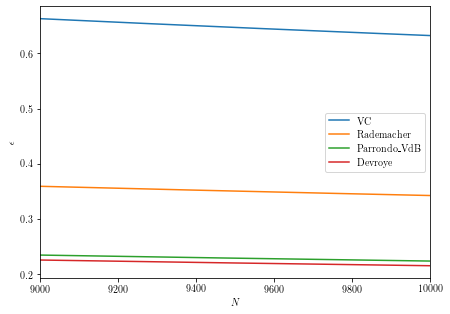

In [8]:
N = np.arange(9000, 10001)
d_vc, sigma= 50, 0.05
plt.figure(figsize=(7, 5))
plt.plot(N, vc_bound(d_vc, sigma, N), label='VC')
plt.plot(N, rademacher_bound(d_vc, sigma, N), label='Rademacher')
plt.plot(N, parrondo_vdb_bound(d_vc, sigma, N), label='Parrondo\_VdB')
plt.plot(N, devroye_bound(d_vc, sigma, N), label='Devroye')
plt.xlim([9000, 10000])
plt.xlabel('$N$')
plt.ylabel('$\epsilon$')
plt.legend()
plt.show()

***Thus, the smallest bound in the choices is [d].***

#### P3: 

In [9]:
print('VC bound at d_vc=50, sigma=0.05, N=5 is {:.2f}.'
      .format(vc_bound(d_vc, sigma, 5)))
print('Rademacher bound at d_vc=50, sigma=0.05, N=5 is {:.2f}.'
      .format(rademacher_bound(d_vc, sigma, 5)))
print('Parrondo and Van den Broek bound at d_vc=50, sigma=0.05, N=5 is {:.2f}.'
      .format(parrondo_vdb_bound(d_vc, sigma, 5)))
print('Devroye bound at d_vc=50, sigma=0.05, N=5 is {:.2f}.'
      .format(devroye_bound(d_vc, sigma, 5)))

VC bound at d_vc=50, sigma=0.05, N=5 is 13.83.
Rademacher bound at d_vc=50, sigma=0.05, N=5 is 8.15.
Parrondo and Van den Broek bound at d_vc=50, sigma=0.05, N=5 is 5.10.
Devroye bound at d_vc=50, sigma=0.05, N=5 is 5.59.


***Thus, the smallest bound at N = 5 is [c].***